In [1]:
import scipy.stats as stats
from math import sqrt
import numpy as np

In [2]:
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'NumericalInverseHermite',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_bootstrap',
 '_common',
 '_constants',
 '_continuous_distns',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_hypotests',
 '_ksstats',
 '_mannwhitneyu',
 '_multivariate',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_relative_risk',
 '_rvs_sampling',
 '_sobol',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'barnard_exact',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'biasedurn',
 'binned_s

In [3]:
np.random.seed(1234)
arr = np.random.normal(loc = 440 , scale = 100, size = 1000)

In [4]:
import seaborn as sns

In [10]:
!pip install seaborn


NameError: name 'seaborn' is not defined

D:\AnacondaS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

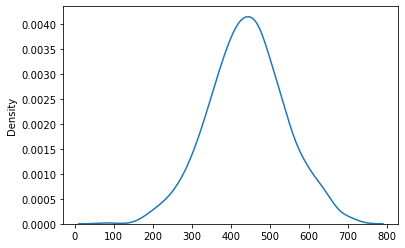

In [11]:
sns.distplot(arr, hist = False)

D:\AnacondaS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnacondaS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

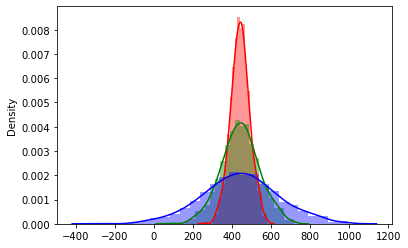

In [8]:
col = ['red', 'green', 'blue']
std  = [50, 100, 200]
c = []
for i in range(3):
    np.random.seed(1234)
    arr = np.random.normal(loc = 440 , scale = std[i], size = 1000)
    c.append(arr)
    sns.distplot(arr, color= col[i])

## with mean = 440 and std = 100 : 
## what is prob that score will be less than 400??

In [10]:
stats.norm.cdf(x = 400, loc = 440 , scale = 100 ) # area from the left till x : prob that will be lower than 400

0.3445782583896758

In [11]:
mu = 30
sigma = 8.20
x = 40
# 40 to +infinity

1 - stats.norm.cdf(x = x, loc = mu, scale = sigma)

0.11132492503925329

In [12]:
mu = 30
sigma = 8.20
x = 20
# -infinity to 20

stats.norm.cdf(x = x, loc = mu, scale = sigma)

0.11132492503925329

In [13]:
area = 0.10 # ( on the right)
# q is area_from_left
mu = 30
sigma = 8.20
stats.norm.ppf(q = 1 - area , loc = mu, scale = sigma)

40.508722837465726

In [20]:
mu = 328
sigma = 92
x = 500
# 500 --> inf
1- stats.norm.cdf(x, mu, sigma)

0.030772109600403552

In [21]:
mu = 328
sigma = 92
x = 250
# - inf --> 250
stats.norm.cdf(x, mu, sigma)

0.19826741629443773

In [22]:
mu = 328
sigma = 92
x1 = 300
x2 = 400
# - inf --> 250
stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x1, mu, sigma)

0.4026400771146216

In [23]:
mu = 328
sigma = 92
area = 0.08 # ( from left bottom 8%)
stats.norm.ppf(area, mu, sigma)

198.7334164515138

## Confidence interval

In [24]:
# area from left
area_z1 = 0.025
area_z2 = 0.975

In [25]:
stats.norm.ppf(area_z1, loc = 0 , scale = 1)

-1.9599639845400545

In [26]:
stats.norm.ppf(area_z2, loc = 0 , scale = 1)

1.959963984540054

In [32]:
xbar = 119115
sigma = 30000
n = 80
c = 0.90
alpha = 1 - c
z = stats.norm.ppf(alpha/2)
mu1 = xbar + (z * sigma/sqrt(n))
mu2 = xbar - (z * sigma/sqrt(n))

In [33]:
mu1,mu2

(113597.99321564914, 124632.00678435086)

In [34]:
stats.norm.interval(0.90 , loc = 119115, scale = 30000/sqrt(80))

(113597.99321564914, 124632.00678435086)

In [35]:
stats.norm.interval(0.95 , loc = 119115, scale = 30000/sqrt(80))

(112541.08094567564, 125688.91905432436)

In [36]:
stats.norm.interval(0.99 , loc = 119115, scale = 30000/sqrt(80))

(110475.40586824308, 127754.59413175692)

In [40]:
import pandas as pd
data = pd.read_excel('Nielsen.xlsx')

In [43]:
xbar = data.Hours.mean()
n = len(data)
std = 3.5/ sqrt(n)
stats.norm.interval(0.95,xbar , std)

(8.10394499307334, 8.89605500692666)

In [45]:
xbar = data.Hours.mean()
n = len(data)
s = data.Hours.std()
c = 0.95
alpha = 1 - c
t = stats.t.ppf(alpha/2, n-1)
mu1 = xbar + (t * s/sqrt(n))
mu2 = xbar - (t * s/sqrt(n))
mu1,mu2

(8.108007871809667, 8.891992128190333)

In [46]:
stats.t.interval(0.95,n-1,xbar , std)

(8.108007871809667, 8.891992128190333)